<a href="https://colab.research.google.com/github/beBijayeeni/Mushroom-Classification/blob/main/mushroom_classification_EDA_model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load the dataset
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/mushroomClassification/mushrooms_revised.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,smooth,white,white,white,one,evanescent,brown,abundant,grasses


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
#Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [ ]:
#Print the counts of unique values for each categorical column
categorical_cols = data.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    print(f"Value counts for {col}:\n", data[col].value_counts())

Value counts for class:
 class
edible       4208
poisonous    3916
Name: count, dtype: int64
Value counts for cap-shape:
 cap-shape
convex     3656
flat       3152
knobbed     828
bell        452
sunken       32
conical       4
Name: count, dtype: int64
Value counts for cap-surface:
 cap-surface
scaly      3244
smooth     2556
fibrous    2320
grooves       4
Name: count, dtype: int64
Value counts for cap-color:
 cap-color
brown       2284
gray        1840
red         1500
yellow      1072
white       1040
buff         168
pink         144
cinnamon      44
purple        16
green         16
Name: count, dtype: int64
Value counts for bruises:
 bruises
no         4748
bruises    3376
Name: count, dtype: int64
Value counts for odor:
 odor
none        3528
foul        2160
fishy        576
spicy        576
almond       400
anise        400
pungent      256
creosote     192
musty         36
Name: count, dtype: int64
Value counts for gill-attachment:
 gill-attachment
free        7914
attached 

In [ ]:
#Encode categorical features
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in data.columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,0,7,1,0,1,0,...,3,3,7,7,2,1,4,0,3,4
1,0,2,3,9,0,0,1,0,0,0,...,3,3,7,7,2,1,4,1,2,0
2,0,0,3,8,0,1,1,0,0,1,...,3,3,7,7,2,1,4,1,2,2
3,1,2,2,8,0,7,1,0,1,1,...,3,3,7,7,2,1,4,0,3,4
4,0,2,3,3,1,6,1,1,0,0,...,3,3,7,7,2,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,4,3,0,1,6,0,0,0,11,...,3,3,4,4,1,1,4,0,1,1
8120,0,2,3,0,1,6,0,0,0,11,...,3,3,4,4,0,1,4,0,4,1
8121,0,3,3,0,1,6,0,0,0,1,...,3,3,4,4,1,1,4,0,1,1
8122,1,4,2,0,1,3,1,0,1,2,...,3,2,7,7,2,1,0,6,4,1


In [ ]:
#Separate target variable and features
x = data.drop('class', axis=1)
y = data['class']

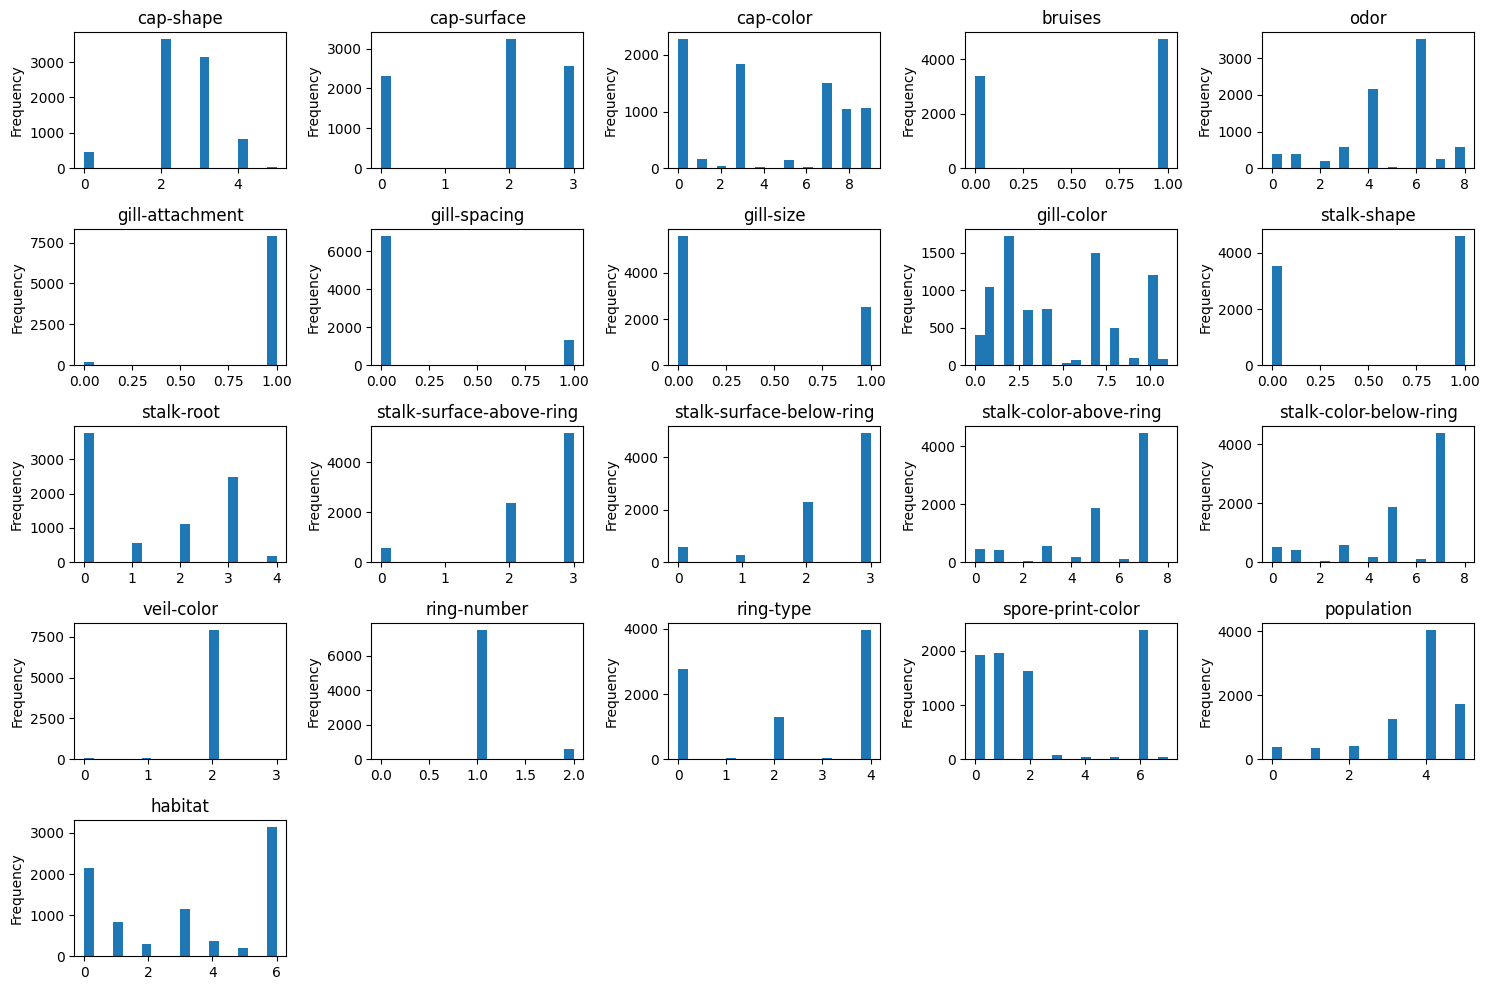

In [ ]:
#Plot histograms for each feature
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
for i, col in enumerate(x.columns):
    plt.subplot(5, 5, i + 1)
    x[col].plot(kind='hist', bins=20)
    plt.title(col)
    plt.tight_layout()
plt.show()

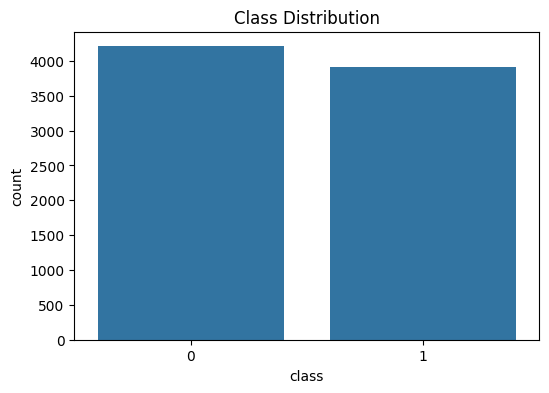

In [ ]:
#Visualise 'class' distribution
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=data)
plt.title('Class Distribution')
plt.show()

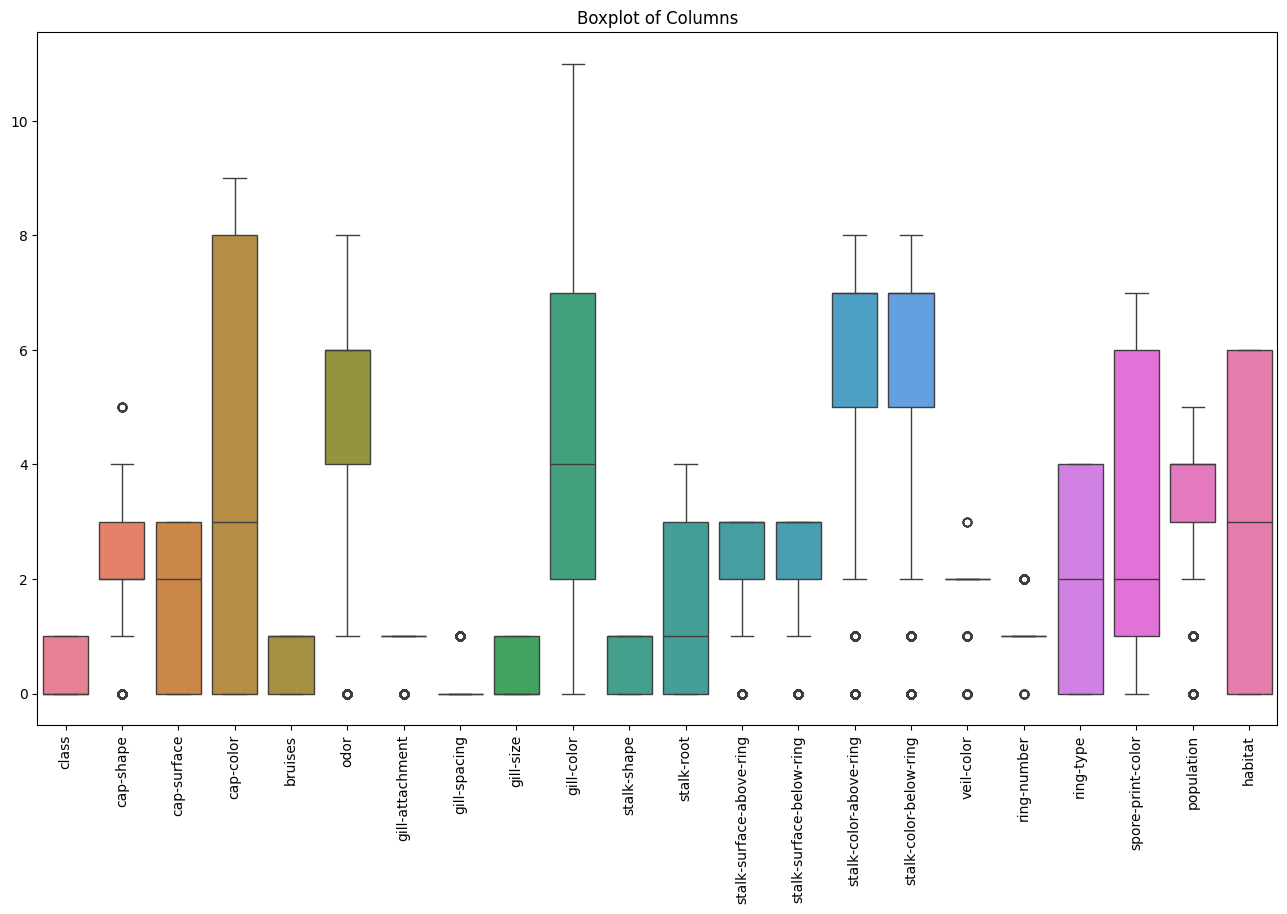

In [ ]:
#Visualize outliers using boxplots
plt.figure(figsize=(16, 9))
sns.boxplot(data)
plt.title("Boxplot of Columns")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Scale columns using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.4       , 1.        , 0.        , ..., 0.        , 0.6       ,
        0.66666667],
       [0.4       , 1.        , 1.        , ..., 0.14285714, 0.4       ,
        0.        ],
       [0.        , 1.        , 0.88888889, ..., 0.14285714, 0.4       ,
        0.33333333],
       ...,
       [0.6       , 1.        , 0.        , ..., 0.        , 0.2       ,
        0.16666667],
       [0.8       , 0.66666667, 0.        , ..., 0.85714286, 0.8       ,
        0.16666667],
       [0.4       , 1.        , 0.        , ..., 0.57142857, 0.2       ,
        0.16666667]])

In [ ]:
#Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#Build model using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy for Random Forest: {accuracy_rf*100:.2f}%")
print("Classification Report for Random Forest:\n",classification_report(y_test, y_pred_rf))

Accuracy for Random Forest: 100.00%
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
#Cross validation for Random Forest
from sklearn.model_selection import cross_val_score, StratifiedKFold
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_scores = cross_val_score(RandomForestClassifier(), x_scaled, y, cv=k_fold, scoring='accuracy')
print("\nRandom Forest Cross-validation Scores:")
print(rf_scores)
print(f"Mean Accuracy: {rf_scores.mean()}")


Random Forest Cross-validation Scores:
[1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


In [ ]:
#Build model using Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
y_pred_lr = logistic_regression.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy for Logistic Regression: {accuracy_lr*100:.2f}%")
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_lr))

Accuracy for Logistic Regression: 96.00%
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       843
           1       0.95      0.97      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Cross validation for Logistic Regression
lr_scores = cross_val_score(LogisticRegression(), x_scaled, y, cv=k_fold, scoring='accuracy')
print("Logistic Regression Cross-validation Scores:")
print(lr_scores)
print(f"Mean Accuracy: {lr_scores.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross-validation Scores:
[0.94953846 0.95569231 0.95569231 0.95015385 0.94950739]
Mean Accuracy: 0.952116862447897


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Build model using Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred_dt = decision_tree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy for Decision Tree: {accuracy_dt*100:.2f}%")
print("Classification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))

Accuracy for Decision Tree: 100.00%
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
#Cross validation for Decision Tree
dt_scores = cross_val_score(DecisionTreeClassifier(), x_scaled, y, cv=k_fold, scoring='accuracy')
print("\nDecision Tree Cross-validation Scores:")
print(dt_scores)
print(f"Mean Accuracy: {dt_scores.mean()}")


Decision Tree Cross-validation Scores:
[1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


In [ ]:
#Build model using Support Vector Machines
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)
y_pred_svm = svm_classifier.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy for SVM: {accuracy_svm*100:.2f}%")
print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svm))

Accuracy for SVM: 99.94%
Classification Report for SVM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
#Cross validation for Support Vector Machine
svm_scores = cross_val_score(SVC(), x_scaled, y, cv=k_fold, scoring='accuracy')
print("\nSVM Cross-validation Scores:")
print(svm_scores)
print(f"Mean Accuracy: {svm_scores.mean()}")


SVM Cross-validation Scores:
[1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


In [ ]:
#Build model using Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(x_train, y_train)
y_pred_gb = gradient_boosting.predict(x_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy for Gradient Boosting: {accuracy_gb*100:.2f}%")
print("Classification Report for Gradient Boosting:\n", classification_report(y_test, y_pred_gb))

Accuracy for Gradient Boosting: 100.00%
Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
#Cross validation for Gradient Boosting
gb_scores = cross_val_score(GradientBoostingClassifier(), x_scaled, y, cv=k_fold, scoring='accuracy')
print("\nGradient Boosting Cross-validation Scores:")
print(gb_scores)
print(f"Mean Accuracy: {gb_scores.mean()}")


Gradient Boosting Cross-validation Scores:
[1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


In [ ]:
#Build model using k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)
y_pred_knn = knn_classifier.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy for KNN: {accuracy_knn*100:.2f}%")
print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))

Accuracy for KNN: 100.00%
Classification Report for KNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
#Cross validation for k-Nearest Neighbors
knn_scores = cross_val_score(KNeighborsClassifier(), x_scaled, y, cv=k_fold, scoring='accuracy')
print("\nk-Nearest Neighbors Cross-validation Scores:")
print(knn_scores)
print(f"Mean Accuracy: {knn_scores.mean()}")


k-Nearest Neighbors Cross-validation Scores:
[1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
